# Import Packages

In [30]:
import pandas as pd
import numpy as np
from plotnine import *
import geopandas as gpd
import geoplot as gplt
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# load the data
demographics_problems_merged = pd.read_pickle('../data/clean_presented_problems.pkl')
demographics_problems_merged.head()

,Local ID,state_demographics,enrollment_date,enrollment_ym_derived,enrollment_year,disability_level,disability_level_ordered,presented_problems,Gender,Ethnicity,County
0,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,"aggression (physical, verbal, property destruc...",Female,Not of Hispanic origin,Swain
1,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,decrease in ability to participate in daily fu...,Female,Not of Hispanic origin,Swain
2,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,leaving unexpectedly,Female,Not of Hispanic origin,Swain
3,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,mental health symptoms,Female,Not of Hispanic origin,Swain
4,1021487,texas,2020-03-02,2020-03-01,2020,Mild,Mild,"aggression (physical, verbal, property destruc...",Male,Not of Hispanic origin,Tarrant


In [3]:
# creating new subset for people that presented aggression problems
demographics_aggression_problems = demographics_problems_merged[demographics_problems_merged["presented_problems"] == "aggression (physical, verbal, property destruction, threats)"].copy()

# verifying we subsetted correctly
demographics_aggression_problems["presented_problems"].value_counts()

aggression (physical, verbal, property destruction, threats)    3929
Name: presented_problems, dtype: int64

In [4]:
demographics_aggression_problems['disability_level_ordered'].value_counts()
demographics_aggression_problems['Gender'].value_counts()
demographics_aggression_problems['Ethnicity'].value_counts()

demographics_aggression_problems.groupby("Gender")['disability_level_ordered'].value_counts()

demographics_aggression_problems.groupby("disability_level_ordered")['state_demographics'].value_counts()


Mild                   1777
Moderate               1286
Severe                  328
Normal intelligence     271
Borderline              210
Profound                 56
Name: disability_level_ordered, dtype: int64

Male      2724
Female    1205
Name: Gender, dtype: int64

Not of Hispanic origin                      2993
Hispanic - specific origin not specified     644
Unknown, not collected                       292
Name: Ethnicity, dtype: int64

Gender                     
Female  Mild                    622
        Moderate                387
        Severe                   88
        Borderline               49
        Normal intelligence      47
        Profound                 12
Male    Mild                   1155
        Moderate                899
        Severe                  240
        Normal intelligence     224
        Borderline              161
        Profound                 44
Name: disability_level_ordered, dtype: int64

disability_level_ordered  state_demographics
Normal intelligence       new york              129
                          north carolina         94
                          california             36
                          texas                   7
                          new hampshire           5
Borderline                new york              111
                          north carolina         27
                          california             25
                          new hampshire          22
                          texas                  15
                          iowa                   10
Mild                      new york              885
                          north carolina        360
                          new hampshire         193
                          texas                 156
                          california             94
                          iowa                   79
                          colorado               10
Moderate           

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)')

<AxesSubplot:title={'center':'Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)'}, xlabel='Enrollment Year', ylabel='Count'>

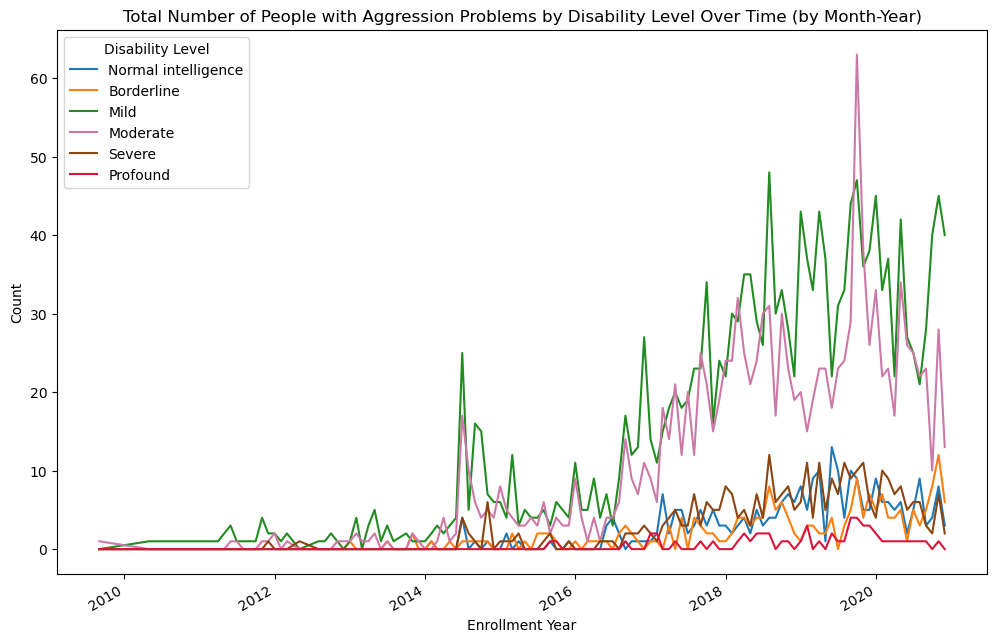

In [5]:
# define a dictionary of colors for each disability level
colors = {'Normal intelligence': '#1f77b4', 'Borderline': '#ff7f0e', 'Mild': '#228B22', 'Moderate': '#CC79A7', 'Severe': '#8B4513', 'Profound': '#DC143C'}

# line plot of the total number of people for each disability level over time (by month-year)
plot_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['disability_level_ordered'].value_counts().unstack().fillna(0).plot(figsize=(12, 8), color=colors.values())

plot_by_ym.set_xlabel("Enrollment Year")
plot_by_ym.set_ylabel("Count")
plot_by_ym.legend(title="Disability Level", labels=colors.keys())
plot_by_ym.set_title("Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)")
plot_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People with Aggression Problems by Disability Level Over Time (by Year)')

<AxesSubplot:title={'center':'Total Number of People with Aggression Problems by Disability Level Over Time (by Year)'}, xlabel='Enrollment Year', ylabel='Count'>

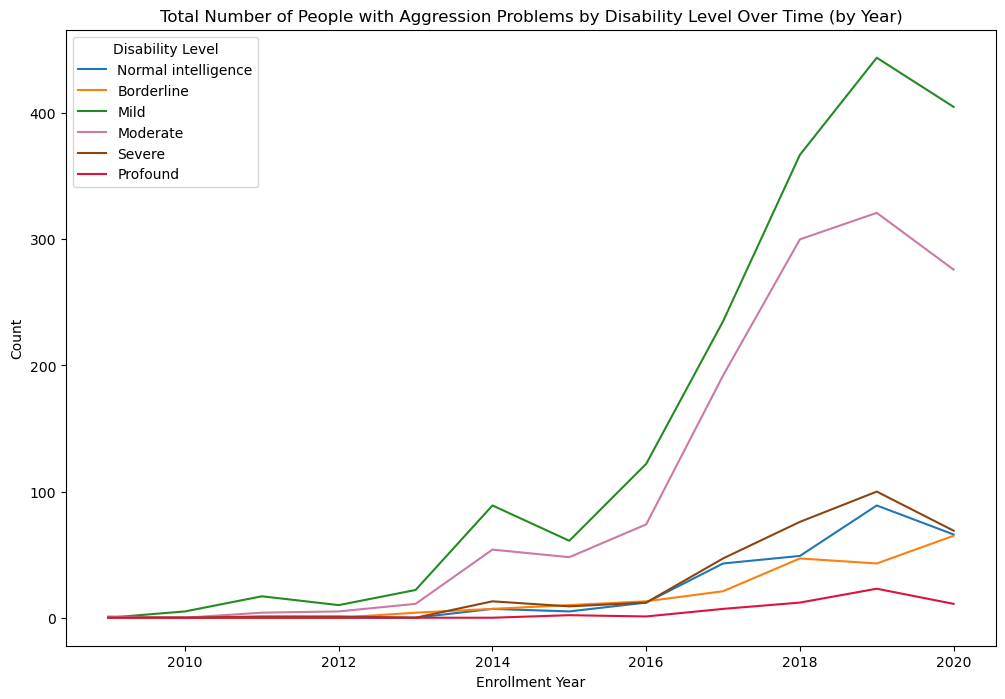

In [6]:
# line plot of the total number of people for each aggression level by year
plot_by_y = demographics_aggression_problems.groupby('enrollment_year')['disability_level_ordered'].value_counts().unstack().fillna(0).plot(figsize=(12, 8), color=colors.values())
plot_by_y.set_xlabel("Enrollment Year")
plot_by_y.set_ylabel("Count")
plot_by_y.legend(title="Disability Level")
plot_by_y.set_title("Total Number of People with Aggression Problems by Disability Level Over Time (by Year)")
plot_by_y


Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People by Gender Over Time (by Month-Year)')

<AxesSubplot:title={'center':'Total Number of People by Gender Over Time (by Month-Year)'}, xlabel='Enrollment Year', ylabel='Count'>

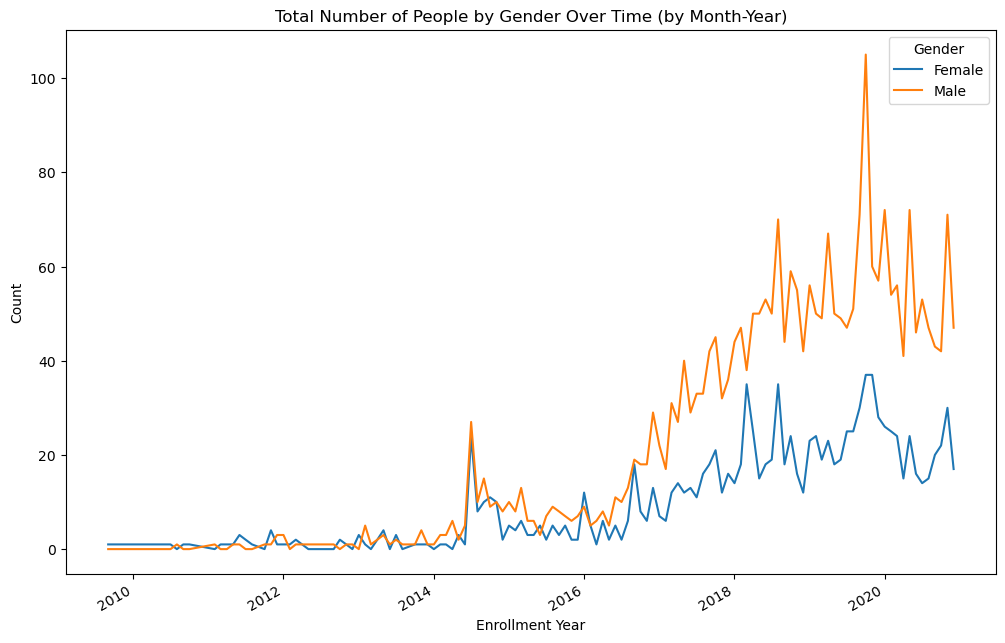

In [7]:
# line plot of the total number of people for each aggression level by year
gender_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['Gender'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym.set_title("Total Number of People by Gender Over Time (by Month-Year)")
gender_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People by Gender Over Time (by Year)')

<AxesSubplot:title={'center':'Total Number of People by Gender Over Time (by Year)'}, xlabel='Enrollment Year', ylabel='Count'>

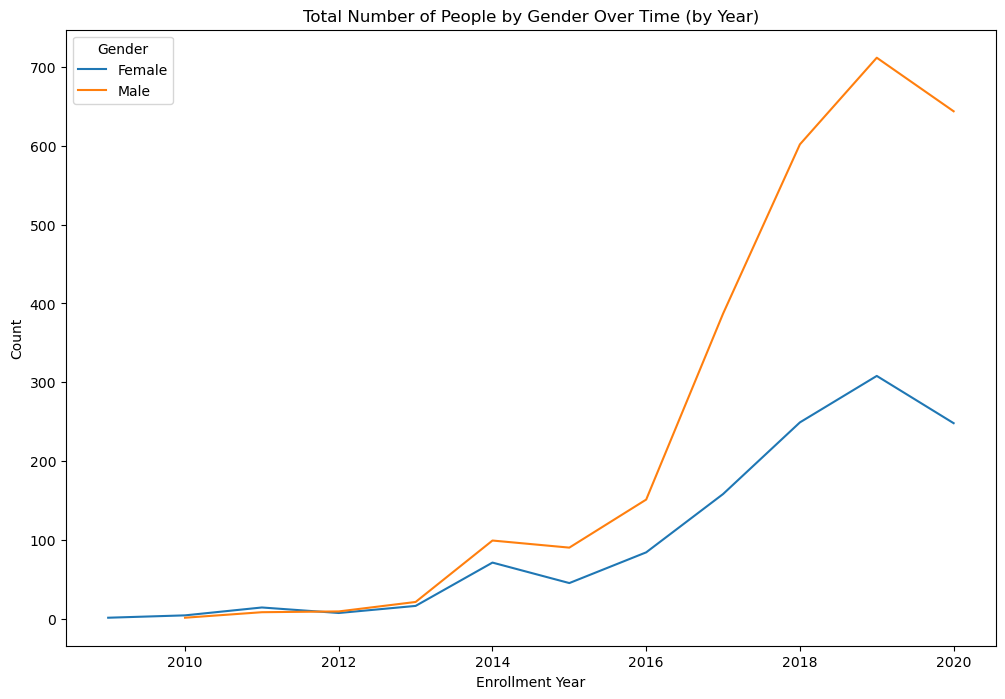

In [8]:
gender_by_ym = demographics_aggression_problems.groupby('enrollment_year')['Gender'].value_counts().unstack().plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym.set_title("Total Number of People by Gender Over Time (by Year)")
gender_by_ym

<AxesSubplot:xlabel='enrollment_year'>

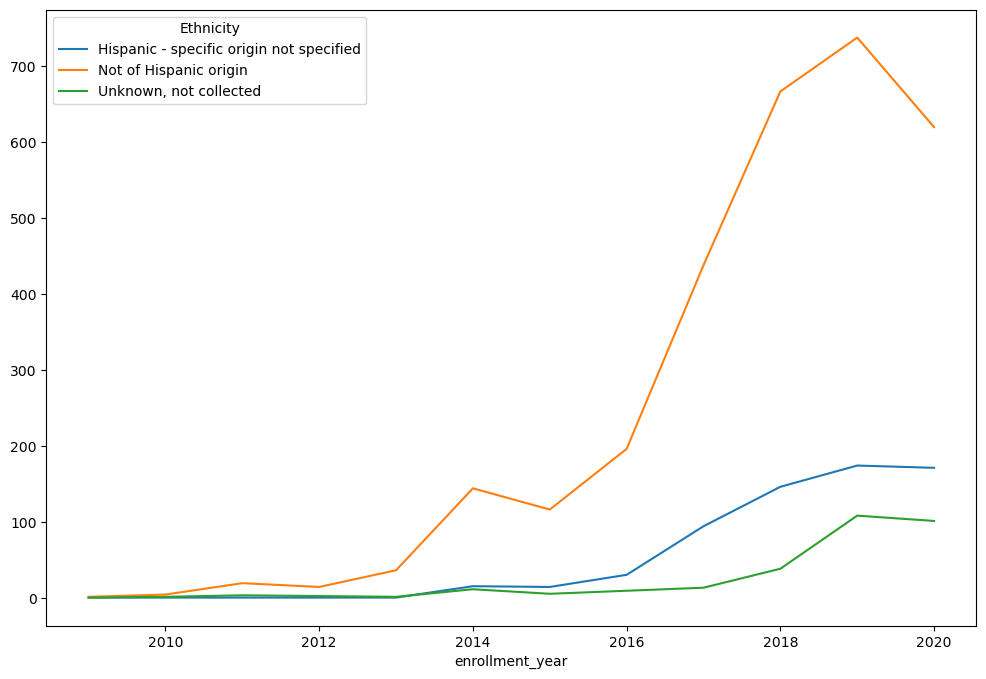

In [9]:
demographics_aggression_problems.groupby('enrollment_year')['Ethnicity'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Level by Gender')

<AxesSubplot:title={'center':'Proportion of Disability Level by Gender'}, xlabel='Gender', ylabel='Proportion'>

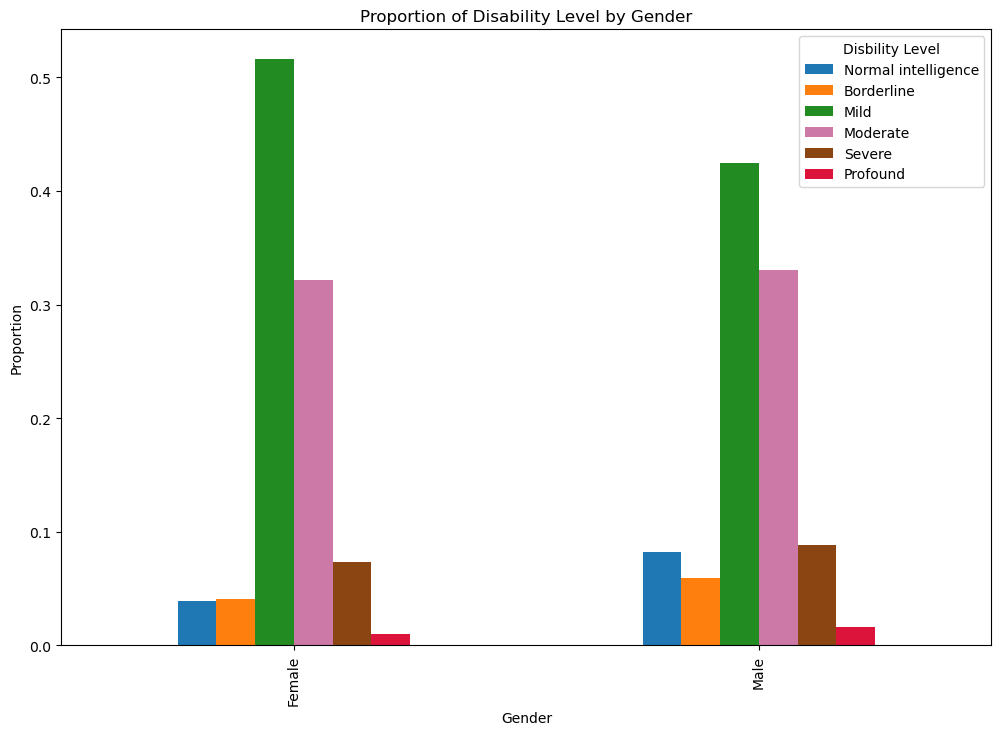

In [10]:
# Disability level by gender
disability_by_gender = demographics_aggression_problems.groupby("Gender")['disability_level_ordered'].value_counts(normalize = True).unstack().plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_gender.set_ylabel("Proportion")
disability_by_gender.legend(title="Disbility Level")
disability_by_gender.set_title("Proportion of Disability Level by Gender")
disability_by_gender

Text(0.5, 0, 'Enrollment Year, Gender')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Level by Gender for 2019 and 2020')

<AxesSubplot:title={'center':'Proportion of Disability Level by Gender for 2019 and 2020'}, xlabel='Enrollment Year, Gender', ylabel='Proportion'>

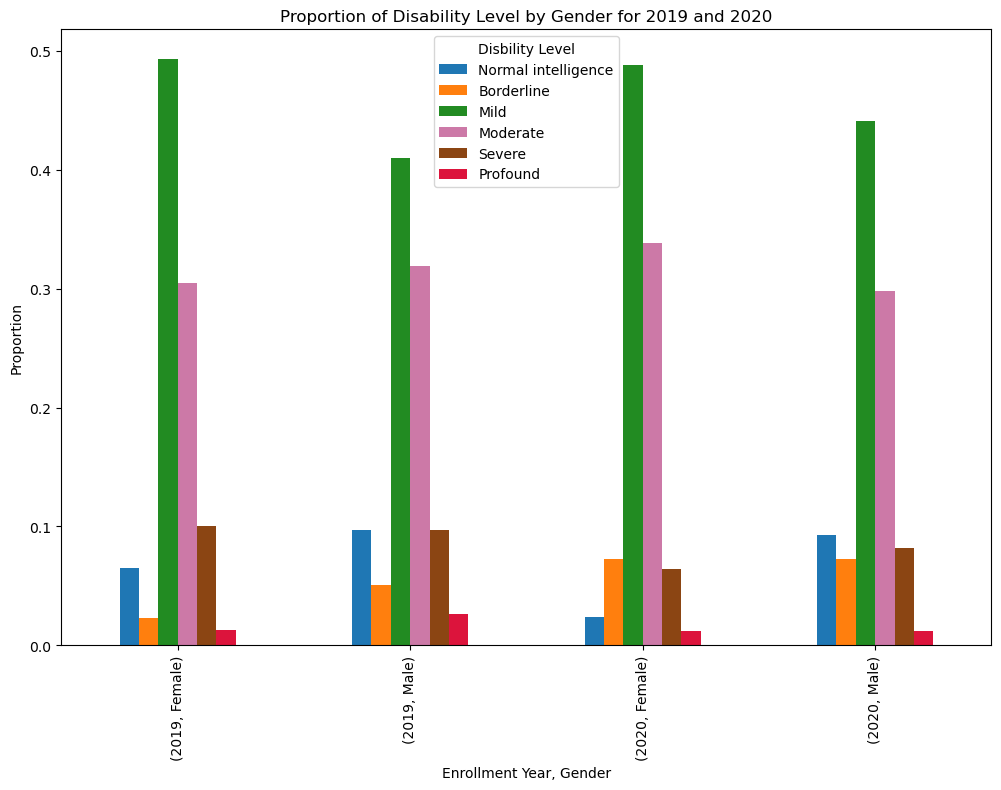

In [11]:
temp = demographics_aggression_problems[demographics_aggression_problems.enrollment_year > 2018]
disability_after_2018 = temp.groupby(['enrollment_year', 'Gender'])['disability_level_ordered'].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_after_2018.set_xlabel("Enrollment Year, Gender")
disability_after_2018.set_ylabel("Proportion")
disability_after_2018.legend(title="Disbility Level")
disability_after_2018.set_title("Proportion of Disability Level by Gender for 2019 and 2020")
disability_after_2018

Text(0.5, 0, 'State')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Levels by State for People with Aggression Problems')

<AxesSubplot:title={'center':'Proportion of Disability Levels by State for People with Aggression Problems'}, xlabel='State', ylabel='Proportion'>

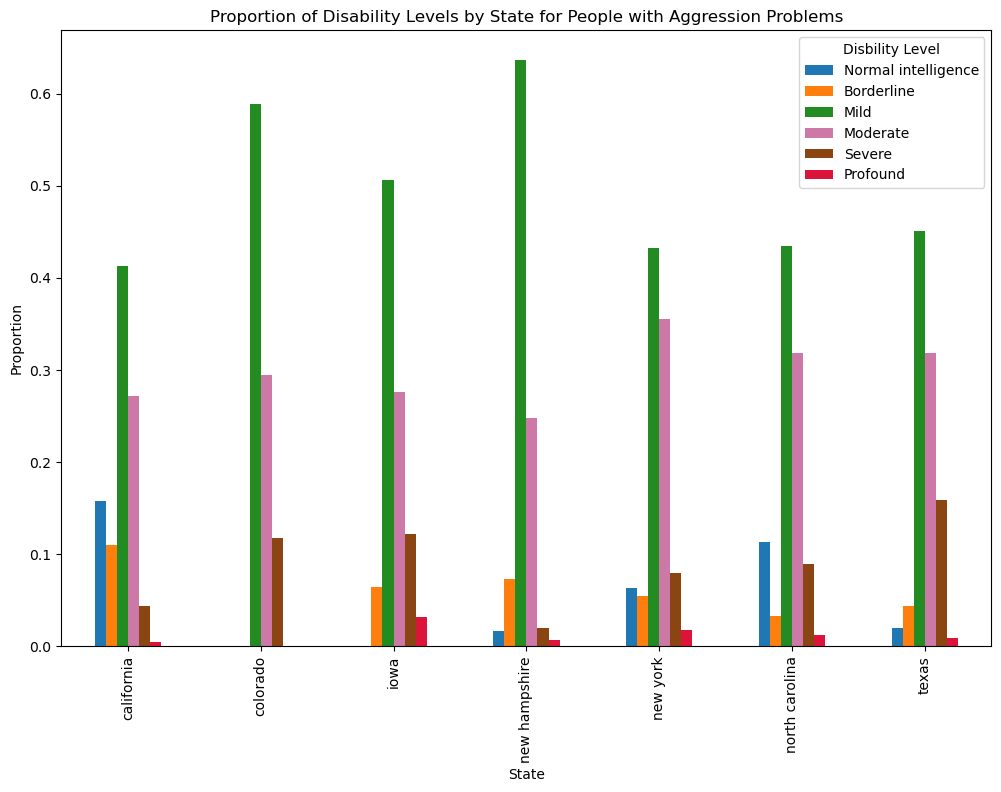

In [12]:
disability_by_state = demographics_aggression_problems.groupby(['state_demographics'])["disability_level_ordered"].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_state.set_xlabel("State")
disability_by_state.set_ylabel("Proportion")
disability_by_state.legend(title="Disbility Level")
disability_by_state.set_title("Proportion of Disability Levels by State for People with Aggression Problems")
disability_by_state

Text(0.5, 0, 'State')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Levels by State for People for the Entire Dataset')

<AxesSubplot:title={'center':'Proportion of Disability Levels by State for People for the Entire Dataset'}, xlabel='State', ylabel='Proportion'>

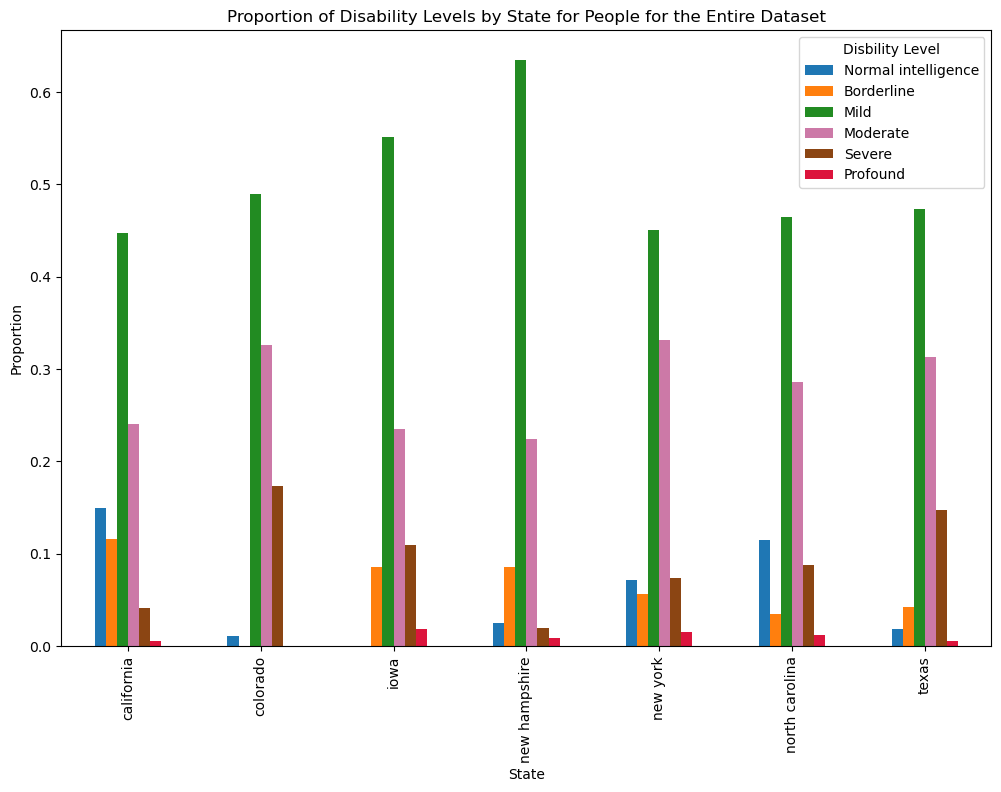

In [13]:
## the demographics merged dataset before subsetting to aggression problems
disability_by_state_full_dataset = demographics_problems_merged.groupby(['state_demographics'])["disability_level_ordered"].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_state_full_dataset.set_xlabel("State")
disability_by_state_full_dataset.set_ylabel("Proportion")
disability_by_state_full_dataset.legend(title="Disbility Level")
disability_by_state_full_dataset.set_title("Proportion of Disability Levels by State for People for the Entire Dataset")
disability_by_state_full_dataset

In [14]:
# subset to people with mild disability level that have agression issues
mild_aggression_problems = demographics_aggression_problems[demographics_aggression_problems['disability_level'] == 'Mild'].copy()

In [15]:
# create dataframe with count of people with mild disability level that have agression issues
aggression_mild_df = pd.DataFrame(mild_aggression_problems.groupby("enrollment_year").agg({"Local ID":"count"})).reset_index()
aggression_mild_df 

,enrollment_year,Local ID
0,2010,5
1,2011,17
2,2012,10
3,2013,22
4,2014,89
5,2015,61
6,2016,122
7,2017,235
8,2018,367
9,2019,444


In [16]:
# subset to people with mild disability level from general dataframe
mild_df = demographics_problems_merged[demographics_problems_merged['disability_level'] == 'Mild'].copy()
mild_df.head()

,Local ID,state_demographics,enrollment_date,enrollment_ym_derived,enrollment_year,disability_level,disability_level_ordered,presented_problems,Gender,Ethnicity,County
0,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,"aggression (physical, verbal, property destruc...",Female,Not of Hispanic origin,Swain
1,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,decrease in ability to participate in daily fu...,Female,Not of Hispanic origin,Swain
2,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,leaving unexpectedly,Female,Not of Hispanic origin,Swain
3,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,mental health symptoms,Female,Not of Hispanic origin,Swain
4,1021487,texas,2020-03-02,2020-03-01,2020,Mild,Mild,"aggression (physical, verbal, property destruc...",Male,Not of Hispanic origin,Tarrant


In [17]:
# create dataframe with count of people with mild disability level
gen_mild_df = pd.DataFrame(mild_df.groupby("enrollment_year").agg({"Local ID":"count"})).reset_index()
gen_mild_df 

,enrollment_year,Local ID
0,2010,24
1,2011,93
2,2012,50
3,2013,122
4,2014,338
5,2015,238
6,2016,512
7,2017,983
8,2018,1561
9,2019,1997


In [18]:
# merge both dattaframes with counts
mild_merged_df =  aggression_mild_df.merge(gen_mild_df, left_on='enrollment_year', right_on='enrollment_year',
                                                                  how='inner', suffixes=('_agression', '_general'), 
                                                                  indicator = True).drop_duplicates()
mild_merged_df

,enrollment_year,Local ID_agression,Local ID_general,_merge
0,2010,5,24,both
1,2011,17,93,both
2,2012,10,50,both
3,2013,22,122,both
4,2014,89,338,both
5,2015,61,238,both
6,2016,122,512,both
7,2017,235,983,both
8,2018,367,1561,both
9,2019,444,1997,both


In [19]:
# create new variable in merged df for percent of people with mild disability level that have agression issues
mild_merged_df["mild_perc"] = mild_merged_df['Local ID_agression'] / mild_merged_df['Local ID_general']
mild_merged_df

,enrollment_year,Local ID_agression,Local ID_general,_merge,mild_perc
0,2010,5,24,both,0.208333
1,2011,17,93,both,0.182796
2,2012,10,50,both,0.200000
3,2013,22,122,both,0.180328
4,2014,89,338,both,0.263314
5,2015,61,238,both,0.256303
6,2016,122,512,both,0.238281
7,2017,235,983,both,0.239064
8,2018,367,1561,both,0.235106
9,2019,444,1997,both,0.222334


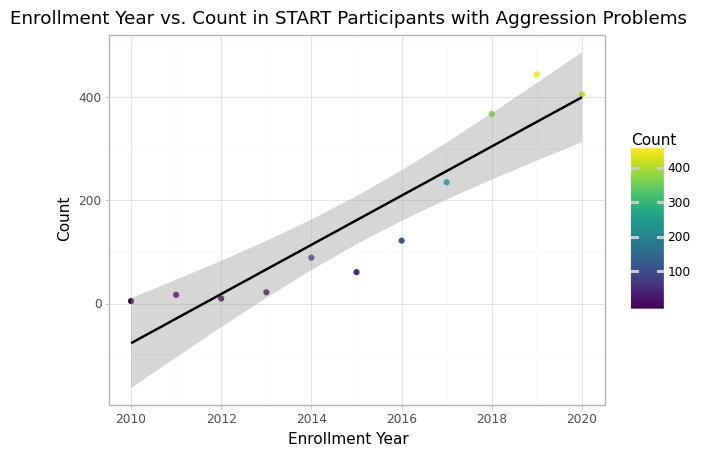

<ggplot: (8764574425046)>

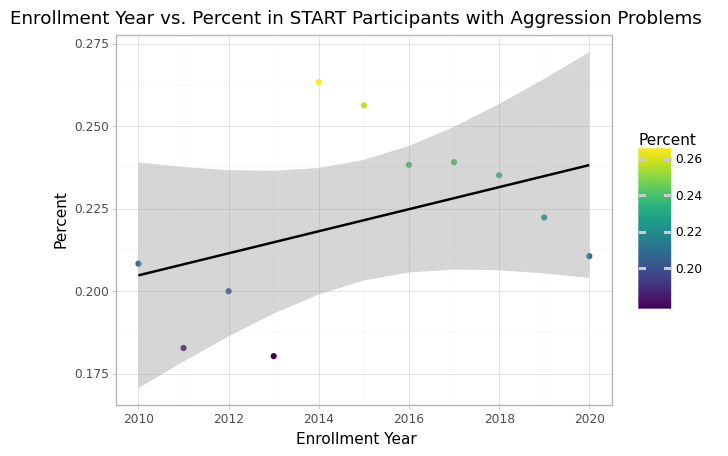

<ggplot: (8764537352912)>

In [20]:
def make_smoothed_plot(df, y_var, y_label):
        return (ggplot(df, aes(x = "enrollment_year", y = y_var, color = y_var))
                + geom_point()
                + geom_smooth(method = "lm")
                + labs(x = 'Enrollment Year', y = y_label, color = y_label,
                       title = "Enrollment Year vs. " + y_label + " in START Participants with Aggression Problems")
                + theme_light()
                + scale_x_continuous(breaks=(2010, 2012, 2014, 2016, 2018, 2020)))
        
make_smoothed_plot(aggression_mild_df, 'Local ID', 'Count')                                                                                                                                                                                                                     
make_smoothed_plot(mild_merged_df, 'mild_perc', 'Percent')

In [21]:
# subsetting to people w/ aggression in New York State
ny_aggression = demographics_aggression_problems[demographics_aggression_problems['state_demographics'] 
                                                 == 'new york'].reset_index().copy()

# verifying subsetting was done correctly
ny_aggression['state_demographics'].value_counts()

# unique counties
ny_aggression.County.nunique()
ny_aggression.County.unique()

new york    2049
Name: state_demographics, dtype: int64

45

array(['Kings', 'Suffolk', 'Cattaraugus', 'Monroe', 'Queens', 'Bronx',
       'Richmond', 'Niagara', 'Saratoga', 'Ulster', 'New York',
       'Columbia', 'Nassau', 'Orange', 'Livingston', 'Schoharie',
       'Steuben', 'Dutchess', 'Schenectady', 'Westchester', 'Rockland',
       'Albany', 'Wayne', 'Erie', 'Montgomery', 'Warren', 'Wyoming',
       'Genesee', 'Rensselaer', 'Fulton', 'Chemung', 'Yates',
       'Chautauqua', 'Ontario', 'Allegany', 'Schuyler', 'Putnam',
       'Orleans', 'Delaware', 'Sullivan', 'Washington', 'Greene',
       'Madison', 'Oneida', 'Herkimer'], dtype=object)

In [22]:
# create dataframe with count of people with agression issues in NYS
ny_county_agression = pd.DataFrame(ny_aggression.groupby(['County', 'state_demographics']).agg({"index":"count"})).reset_index().copy()

# creating percentage per county
ny_county_agression['county_perc'] = ny_county_agression['index']/2049
ny_county_agression

,County,state_demographics,index,county_perc
0,Albany,new york,41,0.020010
1,Allegany,new york,11,0.005368
2,Bronx,new york,165,0.080527
3,Cattaraugus,new york,17,0.008297
4,Chautauqua,new york,18,0.008785
5,Chemung,new york,25,0.012201
6,Columbia,new york,16,0.007809
7,Delaware,new york,1,0.000488
8,Dutchess,new york,50,0.024402
9,Erie,new york,172,0.083943


In [83]:
# reading in counties shapefile with NYS county shapes
file = '/Users/esmer1/Desktop/qss20folder/qss_final_project/data/NYS_Civil_Boundaries/Counties.shp'
ny_counties =  gpd.read_file(file)

# dropping columns with all null values
ny_counties = ny_counties.drop(columns=['DOS_LL', 'DOSLL_DATE'])
ny_counties

,NAME,ABBREV,GNIS_ID,FIPS_CODE,SWIS,NYSP_ZONE,POP1990,POP2000,POP2010,POP2020,NYC,CALC_SQ_MI,DATEMOD,Shape_Leng,Shape_Area,geometry
0,Albany,ALBA,974099,36001,010000,East,292594,294565,304204,314848,N,532.791779,2017-11-10,166077.834242,1.379924e+09,"POLYGON ((605729.038 4737866.883, 606008.186 4..."
1,Allegany,ALLE,974100,36003,020000,West,50470,49927,48946,46456,N,1035.209131,2019-04-26,210499.339692,2.681179e+09,"POLYGON ((229573.870 4712922.870, 229713.780 4..."
2,Bronx,BRON,974101,36005,600000,Long Island,1203789,1332650,1385108,1472654,Y,57.472148,2019-10-04,57253.861278,1.488522e+08,"POLYGON ((595540.679 4528518.902, 595766.658 4..."
3,Broome,BROO,974102,36007,030000,Central,212160,200536,200600,198683,N,715.287465,2019-04-26,227933.332021,1.852586e+09,"POLYGON ((428899.262 4696276.376, 428927.641 4..."
4,Cattaraugus,CATT,974103,36009,040000,West,84234,83955,80317,77042,N,1324.309219,2019-04-26,276084.505177,3.429945e+09,"POLYGON ((169747.340 4717358.900, 169915.500 4..."
5,Cayuga,CAYU,974104,36011,050000,Central,82313,81963,80026,76248,N,881.823505,2018-07-18,334039.796291,2.283912e+09,"POLYGON ((369644.210 4793177.136, 369652.929 4..."
6,Chautauqua,CHAU,974105,36013,060000,West,141895,139750,134905,127657,N,1507.794553,2019-04-26,247508.472122,3.905170e+09,"POLYGON ((161319.791 4720792.650, 161364.233 4..."
7,Chemung,CHEM,974106,36015,070000,Central,95195,91070,88830,84148,N,410.959316,2019-04-26,146916.780908,1.064380e+09,"POLYGON ((353386.882 4683986.897, 354047.104 4..."
8,Chenango,CHEN,974107,36017,080000,Central,51768,51401,50477,47220,N,897.818644,2018-10-03,226955.156017,2.325340e+09,"POLYGON ((464936.423 4732625.754, 464946.200 4..."
9,Clinton,CLIN,974108,36019,090000,East,85969,79894,82128,79843,N,1116.813729,2018-12-07,235243.351670,2.892534e+09,"POLYGON ((629506.656 4951183.693, 629505.066 4..."


<AxesSubplot:>

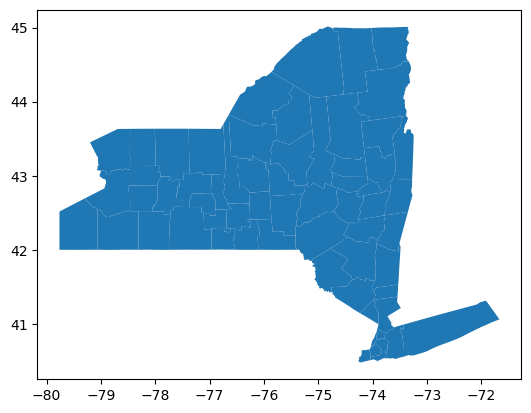

In [24]:
# changing projection of map
ny_counties.to_crs(epsg=4269, inplace = True)

# verifying ny_counties looks correct
ny_counties.plot()

In [25]:
# merging shapefile df and data df to make mapping easier
ny_counties = pd.merge(left=ny_counties, right=ny_county_agression,
                      left_on='NAME', right_on='County',
                      how='left')

In [26]:
ny_counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   NAME                62 non-null     object  
 1   ABBREV              62 non-null     object  
 2   GNIS_ID             62 non-null     object  
 3   FIPS_CODE           62 non-null     object  
 4   SWIS                62 non-null     object  
 5   NYSP_ZONE           62 non-null     object  
 6   POP1990             62 non-null     int64   
 7   POP2000             62 non-null     int64   
 8   POP2010             62 non-null     int64   
 9   POP2020             62 non-null     int64   
 10  NYC                 62 non-null     object  
 11  CALC_SQ_MI          62 non-null     float64 
 12  DATEMOD             60 non-null     object  
 13  Shape_Leng          62 non-null     float64 
 14  Shape_Area          62 non-null     float64 
 15  geometry            62 non-null   

<AxesSubplot:>

Text(0.5, 1.0, 'Percent of START Partcipants with Aggression in New York State')

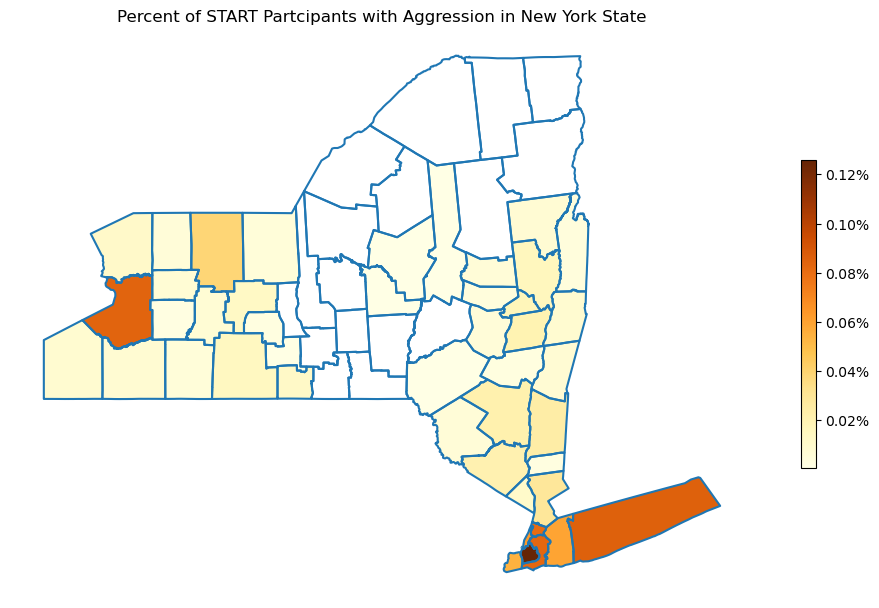

In [76]:
# creating boundary lines for each county
ax = ny_counties.boundary.plot(figsize=(12,8))

# plotting NYS and customizing legend and color
ny_counties.plot(ax=ax, column='county_perc',legend=True, cmap='YlOrBr', 
                 legend_kwds={'shrink':0.5, 'format':'%.2f%%'})

# taking away axis from visualization
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# taking away edge outline
for edge in ['top', 'bottom', 'right', 'left']:
    ax.spines[edge].set_visible(False)

# establishing title
ax.set_title('Percent of START Partcipants with Aggression in New York State')

# showing the map
plt.show()

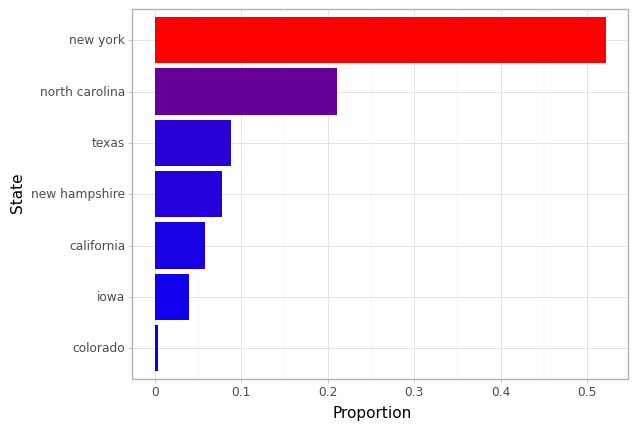

<ggplot: (8764589387707)>

In [87]:
temp = pd.DataFrame(demographics_aggression_problems['state_demographics'].value_counts(normalize=True)).reset_index()
temp['index'] = temp['index'].astype('category')
(ggplot(temp, aes(x = 'reorder(index, state_demographics)', y = 'state_demographics', fill = 'state_demographics'))
            + geom_col()
            + coord_flip()
            + scale_fill_gradient(low='blue', high='red')
            + labs(x = 'State', y = 'Proportion')
            + theme_light()
            + theme(legend_position='none'))